<div style= "text-align: right">
    <p style= "text-align: right; font-weight: bold; font-size: x-large;">FIT1043 Introduction to Data Science</p>
    <p style= "text-align: right; font-weight: bold; font-size: large;">Assignment 1</p>
    <p style= "text-align: right">FOO KAI YAN<br><br><i>33085625<br><br><i>21<sup>th</sup> August 2022</i></p>
<div>
<hr style="border-color: black;">

## Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

# Import seaborn which allows a more comfortable viewing for visual graph
import seaborn as sns

os.chdir("C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2")
os.getcwd()

'C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2'

## Reading CSV Files

In [2]:
# Read monthly_smartcard_replacements.csv file
smartcard = pd.read_csv('monthly_smartcard_replacements.csv')

## Assignment - Part A

In [3]:
# A1
# .shape to get the dimension of the data's table
# (rows, columns)
smartcard.shape

(5792, 5)

In [4]:
# A2
# Missing data is represented as None or NaN
# Column 1 = "Month"
filtered_smartcard = pd.isnull(smartcard["Month"]).sum()
filtered_smartcard
# No null values as it's 0

0

In [5]:
# Column 2 = "Transaction"
filtered_smartcard = pd.isnull(smartcard["Transaction"]).sum()
filtered_smartcard
# No null values as it's 0

0

In [6]:
# Column 3 = "Smartcard.Type"
filtered_smartcard = pd.isnull(smartcard["Smartcard.Type"]).sum()
filtered_smartcard
# No null values as it's 0

0

In [7]:
# Column 4 = "Action.Reason"
filtered_smartcard = pd.isnull(smartcard["Action.Reason"]).sum()
filtered_smartcard
# No null values as it's 0

0

In [8]:
# Column 5 = "Number.of.transactions"
filtered_smartcard = pd.isnull(smartcard["Number.of.transactions"]).sum()
filtered_smartcard
# No null values as it's 0

0

In [9]:
# A3
# Creating a DataFrame object named smartcard_columns
smartcard_columns = pd.DataFrame(smartcard, columns=["Month","Transaction","Smartcard.Type","Action.Reason","Number.of.transactions"])
smartcard_columns.dtypes
# Column's name and Column's value datatype is returned
# object = String or mixed datatypes
# int64 = Integers

Month                     object
Transaction               object
Smartcard.Type            object
Action.Reason             object
Number.of.transactions     int64
dtype: object

In [10]:
# A4
# Change datetime format
smartcard.Month = pd.to_datetime(smartcard.Month)
smartcard.Month

0      2019-03-01
1      2019-03-01
2      2019-03-01
3      2019-03-01
4      2019-03-01
          ...    
5787   2020-11-01
5788   2020-12-01
5789   2021-07-01
5790   2021-07-01
5791   2021-12-01
Name: Month, Length: 5792, dtype: datetime64[ns]

In [11]:
# A5
# summary statistics including the basic minimum, maximum and average value
smartcard.agg({"Number.of.transactions": ["count", "min", "max", "median", "mean", "std", "skew"]})

,Number.of.transactions
count,5792.000000
min,1.000000
max,9097.000000
median,18.000000
mean,303.241540
std,845.056684
skew,3.947513


Amongst the 5792 rows under the column Number.of.transactions, there is an average of 303 transactions happening with the minimum transaction happening being 1 and the maximum transaction happening recorded being 9097 due to different smartcard type and reasons of action occurring in different months.

From the summary statistics of minimum transaction happening, it is known that there will always be 1 transaction happening for different smartcard type and reasons of action occurring in different months.

From the summary statistics of count and median transaction happening, there is an even number of observations included in the dataset. Hence, after arranging the data in ascending order, 18 is the value with the same number of data point above and below it, which means 18 is the 50th percentile.

From the summary statistics of skewness, 3.947513 is larger than 1 and is positive. Larger than 1 mean the data collected in this csv file is highly skewed and is not symmetrical. Positive means the data are rightly skewed and most of the outliers if present in the data collected are distributed to the right side of the distribution.

Standard deviation of the data under the column Number.of.transactions is 845 which means each data recorded is spread out into a wider range of values and is further from the mean value in the data.

In [12]:
# A6 
# 1.
# 2 methods: python & what was newly learnt

# Newly learnt:
pd.value_counts(smartcard["Smartcard.Type"])

# Python: (commented)
# unique_value = [] # declare empty list to store each unique value from Smartcard.Type
# Get unique value from Smartcard.Type and store in the empty list (unique_value)
# for value in smartcard["Smartcard.Type"]:
#     if value not in unique_value:
#         unique_value.append(value)
# Get the number of each instances recorded and print them in the format of instance_type(num_of_instance_recorded)
# for elements in unique_value:
#     count = 0
#     for values in smartcard["Smartcard.Type"]:
#         if values == elements:
#             count += 1
#     print(elements, "(", count, ")")

Driver Licence Card          1896
Photo Identification Card    1631
Industry Authority Card      1218
Marine Licence Ind Card      1047
Name: Smartcard.Type, dtype: int64

In [13]:
# A6
# 2.
# 2 methods: python & what was newly learnt

# Newly learnt:
card_num = len(smartcard[smartcard["Smartcard.Type"]=="Driver Licence Card"])
total = smartcard["Smartcard.Type"].count()
# print percentage
print((card_num/total)*100, "%") 

# Python: (commented)
# Get total number of instances recorded in Smartcard.Type column
# total = smartcard["Smartcard.Type"].count()
# Get total number of "Driver Licence Card" recorded in Smartcard.Type column
# unique = "Driver Licence Card"
# count = 0
# for values in smartcard["Smartcard.Type"]:
#     if values == unique:
#         count += 1
# Get percentage value of Driver Licence Card in Smartcard.Type column
# print(((count/total)*100),"%")

32.73480662983425 %


In [14]:
# A7
# 1.
# Get the different reasons for smartcard replacements and each of their number of instances
pd.value_counts(smartcard["Action.Reason"])

Lost                                       539
Managers Approval                          532
Change Customer Details                    521
Lost In Mail - Imu                         519
Stolen                                     471
Destroyed                                  379
Condition Change                           364
Faulty                                     344
Damaged                                    342
Product Exists Othr Surrend Void Cancel    321
Facial Image Is Not A True Likeness        304
Transition Laminate To Smartcard           256
Merged                                     200
Court Order Issued X3 Or X4 Condition      137
Da/dgd Smartcard Replacement Fee Exempt    134
Expired                                    133
Marine Licence Transition                  132
Defective                                   88
Disaster Relief                             48
Remove Gender From Smartcard                28
Name: Action.Reason, dtype: int64

In [15]:
# A7
# 2.
# Total number of months in which 100 or more smartcard replacements are reported due to being "Lost"
smartcard.loc[(smartcard["Number.of.transactions"] >= 100) & (smartcard["Action.Reason"]=="Lost")]

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
12,2019-05-01,Replace Smartcard,Driver Licence Card,Lost,4907
22,2019-07-01,Replace Smartcard,Driver Licence Card,Lost,5369
23,2019-07-01,Replace Smartcard,Photo Identification Card,Lost,681
32,2019-08-01,Replace Smartcard,Photo Identification Card,Lost,641
46,2019-10-01,Replace Smartcard,Driver Licence Card,Lost,5261
...,...,...,...,...,...
5665,2017-06-01,Replace Smartcard,Photo Identification Card,Lost,509
5669,2017-07-01,Replace Smartcard,Photo Identification Card,Lost,637
5709,2018-02-01,Replace Smartcard,Driver Licence Card,Lost,3770
5735,2018-07-01,Replace Smartcard,Photo Identification Card,Lost,596


## Assignment Part - B

In [16]:
# B1
# 1.
# New column named "Year" is created where the year is extracted from "Month" column
smartcard['Year']=smartcard['Month'].dt.year
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


[Text(0.5, 1.0, 'Annual Smartcard Replacements')]

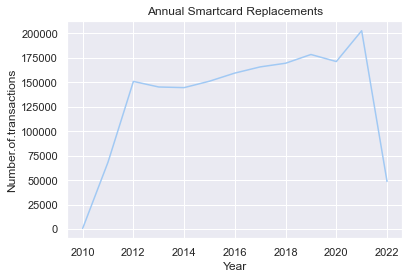

In [17]:
# B1
# 2. 
# tile set to "Annual Smartcard Replacements"
# Line graph with pastel palette created with x-axis as "Year" and y-axis as "Number.of.transactions"
graph1 = smartcard.groupby(["Year"])["Number.of.transactions"].sum()
graph1 = graph1.reset_index()
sns.set_theme(palette="pastel")
sns.lineplot(data = graph1, x = graph1["Year"], y = graph1["Number.of.transactions"], palette = "pastel").set(title="Annual Smartcard Replacements")

In [18]:
# B1
# 3.
# Sort values in "Number.of.transactions" column in ascending order
smartcard.sort_values(by = ["Number.of.transactions"])

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
4543,2012-10-01,Replace Smartcard,Marine Licence Ind Card,Condition Change,1,2012
4178,2016-12-01,Replace Smartcard,Marine Licence Ind Card,Condition Change,1,2016
1017,2013-08-01,Replace Smartcard,Photo Identification Card,Merged,1,2013
4177,2016-11-01,Replace Smartcard,Driver Licence Card,Transition Laminate To Smartcard,1,2016
4175,2016-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2016
...,...,...,...,...,...,...
1961,2021-09-01,Replace Smartcard,Driver Licence Card,Lost,6168,2021
1233,2021-11-01,Replace Smartcard,Driver Licence Card,Lost,6586,2021
2724,2021-12-01,Replace Smartcard,Driver Licence Card,Lost,6714,2021
578,2022-03-01,Replace Smartcard,Driver Licence Card,Lost,6719,2022


In [19]:
# Sort values in "Year" column in descending order
smartcard.sort_values(by = ["Number.of.transactions"],ascending = False)

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
2625,2021-02-01,Replace Smartcard,Driver Licence Card,Lost In Mail - Imu,9097,2021
578,2022-03-01,Replace Smartcard,Driver Licence Card,Lost,6719,2022
2724,2021-12-01,Replace Smartcard,Driver Licence Card,Lost,6714,2021
1233,2021-11-01,Replace Smartcard,Driver Licence Card,Lost,6586,2021
1961,2021-09-01,Replace Smartcard,Driver Licence Card,Lost,6168,2021
...,...,...,...,...,...,...
3661,2019-10-01,Replace Smartcard,Industry Authority Card,Faulty,1,2019
3647,2019-07-01,Replace Smartcard,Marine Licence Ind Card,Damaged,1,2019
3632,2019-04-01,Replace Smartcard,Industry Authority Card,Damaged,1,2019
3628,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Faulty,1,2019


Overall, the line displayed in the line graph increased where the line started going up from year 2010 to 2012 but declined for a year and remained constant until 2014 where the line then started to gradually increase by going up to year 2019. The line then decreased from 2019 to 2020 and climbed up to peak during 2021 and starts declining since 2021. From this line graph, the highest number of transactions recorded was during year 2021 and the least number of transactions recorded was during year 2010 which is the start of the line graph. From what was observed, people were introduced to smartcards around year 2010 and was unaccustomed to use it. But it took 2 years for people to be used to the presence of these smartcards and hence during the next 8 years after year 2012, smartcards were more often used in the daily lives of people as see from the above graph where the climb during these 8 years were constant. The incrementation from year 2010 to 2012 was larger and steeper compared to the incrementation from year 2020 to 2021 which means the rate of transaction happening was increasing and people are slowly adapting to the use of smartcards.

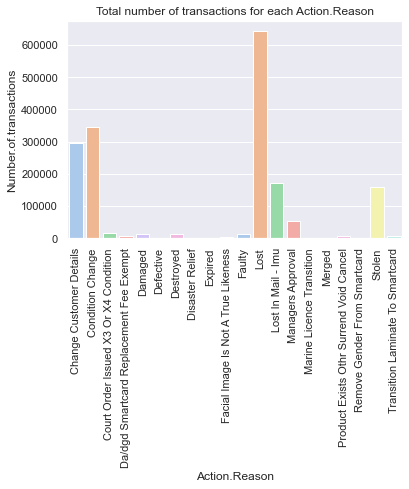

In [20]:
# B2
# 1.
graph2 = smartcard.groupby(["Action.Reason"])["Number.of.transactions"].sum()
graph2 = graph2.reset_index()
sns.set_theme(palette="pastel")
# use .barplot to plot a bar graph
sns.barplot(data = graph2, x = graph2["Action.Reason"], y = graph2["Number.of.transactions"], palette = "pastel").set(title="Total number of transactions for each Action.Reason")
plt.xticks(rotation=90) # Rotate x-labels by 90 degrees
sns.set(rc={'figure.figsize':(20.0,10.0)}) # Make the graph bigger in size

In [21]:
# B2 
# 2. 
graph2 = smartcard.groupby(["Year","Action.Reason"])["Number.of.transactions"].sum()
graph2 = graph2.nlargest(n=17)
graph2 = graph2.groupby(["Action.Reason"]).count()
graph2
# Top 3 reasons are the top 3 "Action.Reason" with the highest "Number.of.transactions" which are:
# Change customer details, Condition change, Lost

Action.Reason
Change Customer Details     1
Condition Change            6
Lost                       10
Name: Number.of.transactions, dtype: int64

In [22]:
# B2
# 3.
annual = smartcard.groupby(["Action.Reason"])["Number.of.transactions"].sum().reset_index()
annual
# According to the values printed out, 14 is the only one between 1000 and 2000
# According to the bar graph above, 14 is Marine Licence Transition

,Action.Reason,Number.of.transactions
0,Change Customer Details,294435
1,Condition Change,344905
2,Court Order Issued X3 Or X4 Condition,17295
3,Da/dgd Smartcard Replacement Fee Exempt,8012
4,Damaged,13027
5,Defective,673
6,Destroyed,14393
7,Disaster Relief,313
8,Expired,2028
9,Facial Image Is Not A True Likeness,4272


In [23]:
# B3
# 1. 
# Group by the year and get the total number of transactions per year
b3_1 = smartcard.groupby(["Year","Action.Reason"])["Number.of.transactions"].sum()
b3_1 = b3_1.reset_index()
pd.set_option("display.max_rows", None)
# Display all the rows instead of limiting it to display a limited amount of rows
b3_1

,Year,Action.Reason,Number.of.transactions
0,2010,Change Customer Details,84
1,2010,Condition Change,39
2,2010,Court Order Issued X3 Or X4 Condition,7
3,2010,Da/dgd Smartcard Replacement Fee Exempt,3
4,2010,Damaged,9
5,2010,Defective,1
6,2010,Faulty,265
7,2010,Lost,124
8,2010,Lost In Mail - Imu,14
9,2010,Managers Approval,13


In [24]:
# B3
# 2.
# Number of years where Action.Reasons with annual transaction is more than 10000
b3q2 = smartcard.groupby(["Action.Reason","Year"])["Number.of.transactions"].sum().reset_index()
b3q2 = b3q2[b3q2["Number.of.transactions"]>10000]
pd.value_counts(b3q2["Action.Reason"])

Lost                       12
Change Customer Details    11
Condition Change           11
Stolen                     10
Lost In Mail - Imu          8
Name: Action.Reason, dtype: int64

In [25]:
# B3
# 3.
# Action.Reasons with at least 1 year's annual transaction more than 10000
b3q3 = smartcard.groupby(["Action.Reason","Year"])["Number.of.transactions"].sum().reset_index()
b3q3 = b3q2[b3q3["Number.of.transactions"]>10000]
print(b3q3["Action.Reason"].unique())

['Change Customer Details' 'Condition Change' 'Lost' 'Lost In Mail - Imu'
 'Stolen']


<AxesSubplot:xlabel='Number.of.transactions', ylabel='Count'>

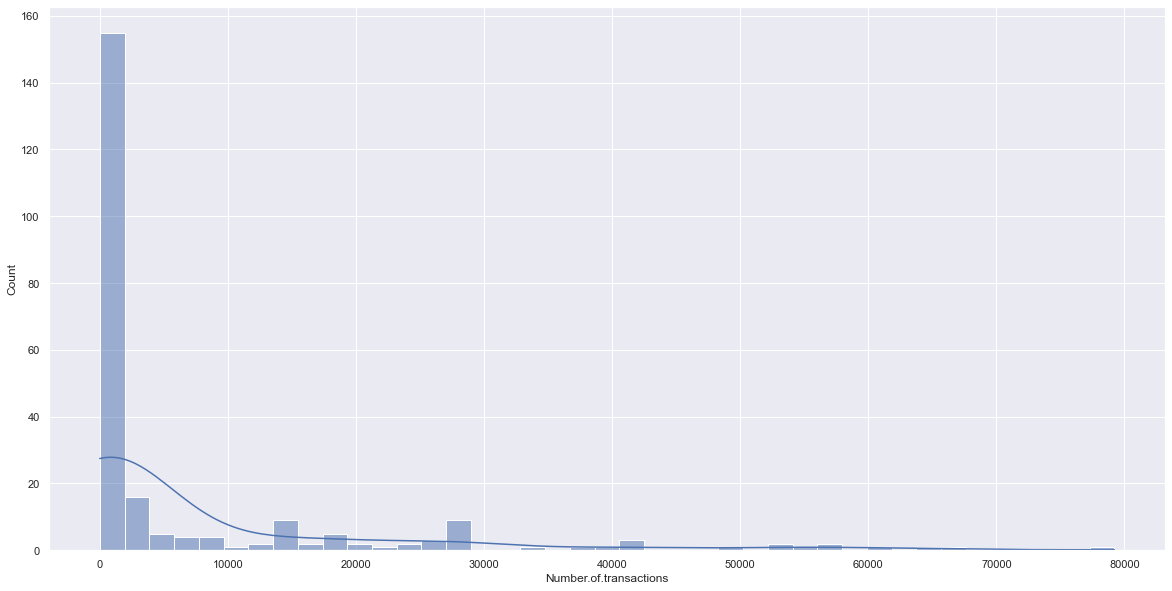

In [26]:
# B3
# 4.
# Plot histogram
b3_4 = smartcard.groupby(["Year","Action.Reason"])["Number.of.transactions"].sum()
b3_4 = b3_4.reset_index()
sns.histplot(data = b3_4, x=b3_4["Number.of.transactions"],kde=True)
# KDE = density of data, show how values are distributed

In [27]:
# B3
# 5.

According to the histogram above, the data is distributed whereby there is a higher density of number of transactions less than 10,000 recorded in the data given when compared to the number of transactions recorded in the data given that is more than 10,000. The histogram above does not show a bell curve in any ways which means that the frequency of the total number of transactions is unequally distributed and hence not a normal distribution. The histogram above has bars that are alternately tall and short with a peak at the start and also a high percentage of the data distribution lied on the right-hand side of the peak as the peak is at 0 to 2000 of number of transactions which is essentially the start of the histogram. This shows that majority of the population only do around 1 to 2000 transaction annually.

## End of Assignment